# Intent
Facade is a structural design pattern that provides a simplified interface to a library, a framework, or any other complex set of classes. Facade defines a higher-
level interface that makes the subsystem easier to use. 
# Motivation
Structuring a system into subsystems helps reduce complexity. A common design goal is to minimize the communication and dependencies between subsystems. One way to achieve this goal is to introduce a facade object that provides a single, simplified interface to the more general facilities of a subsystem. 

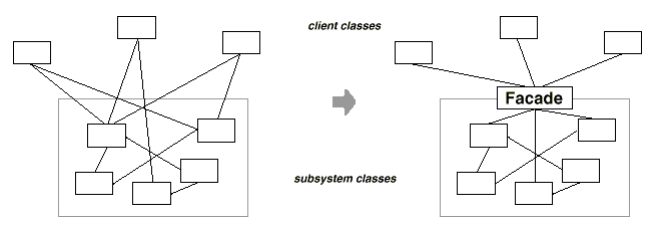

# Use the Facade pattern when
• you want to provide a simple interface to a complex subsystem. Subsystems 
often get more complex as they evolve. Most patterns, when applied, result in 
more and smaller classes. This makes the subsystem more reusable and easier to 
customize, but it also becomes harder to use for clients that don't need to 
customize it. A facade can provide a simple default view of the subsystem that is 
good enough for most clients. Only clients needing more customizability will 
need to look beyond the facade.  \
• there are many dependencies between clients and the implementation classes of 
an abstraction. Introduce a facade to decouple the subsystem from clients and 
other subsystems, thereby promoting subsystem independence and portability.  \
• you want to layer your subsystems. Use a facade to define an entry point to each 
subsystem level. If subsystems are dependent, then you can simplify the 
dependencies between them by making them communicate with each other 
solely through their facades.

In [2]:
class Subsystem1:
    """
    The Subsystem can accept requests either from the facade or client directly.
    In any case, to the Subsystem, the Facade is yet another client, and it's
    not a part of the Subsystem.
    """

    def operation1(self) -> str:
        return "Subsystem1: Ready!"

    # ...

    def operation_n(self) -> str:
        return "Subsystem1: Go!"


class Subsystem2:
    """
    Some facades can work with multiple subsystems at the same time.
    """

    def operation1(self) -> str:
        return "Subsystem2: Get ready!"

    # ...

    def operation_z(self) -> str:
        return "Subsystem2: Fire!"
        
class Facade:
    """
    The Facade class provides a simple interface to the complex logic of one or
    several subsystems. The Facade delegates the client requests to the
    appropriate objects within the subsystem. The Facade is also responsible for
    managing their lifecycle. All of this shields the client from the undesired
    complexity of the subsystem.
    """

    def __init__(self, subsystem1: Subsystem1, subsystem2: Subsystem2) -> None:
        """
        Depending on your application's needs, you can provide the Facade with
        existing subsystem objects or force the Facade to create them on its
        own.
        """

        self._subsystem1 = subsystem1 or Subsystem1()
        self._subsystem2 = subsystem2 or Subsystem2()

    def operation(self) -> str:
        """
        The Facade's methods are convenient shortcuts to the sophisticated
        functionality of the subsystems. However, clients get only to a fraction
        of a subsystem's capabilities.
        """

        results = []
        results.append("Facade initializes subsystems:")
        results.append(self._subsystem1.operation1())
        results.append(self._subsystem2.operation1())
        results.append("Facade orders subsystems to perform the action:")
        results.append(self._subsystem1.operation_n())
        results.append(self._subsystem2.operation_z())
        return "\n".join(results)




def client_code(facade: Facade) -> None:
    """
    The client code works with complex subsystems through a simple interface
    provided by the Facade. When a facade manages the lifecycle of the
    subsystem, the client might not even know about the existence of the
    subsystem. This approach lets you keep the complexity under control.
    """

    print(facade.operation(), end="")

In [3]:
 # The client code may have some of the subsystem's objects already created.
# In this case, it might be worthwhile to initialize the Facade with these
# objects instead of letting the Facade create new instances.
subsystem1 = Subsystem1()
subsystem2 = Subsystem2()
facade = Facade(subsystem1, subsystem2)
client_code(facade)

Facade initializes subsystems:
Subsystem1: Ready!
Subsystem2: Get ready!
Facade orders subsystems to perform the action:
Subsystem1: Go!
Subsystem2: Fire!